#### Packages

In [1]:
#работа с данными
import pandas as pd
import numpy as np

#визуализация
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# статистика
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose

import scipy.stats
import pylab

#### Загрузка и трансформация данных

In [7]:
raw_csv_data = pd.read_csv('Index2018.csv')
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
df_comp.set_index('date', inplace=True)
df_comp = df_comp.asfreq('b')
# b - business days
# d - days
# a - annualy
df_comp = df_comp.fillna(method  = 'ffill')

## Убираем лишнее

In [8]:
df_comp['market_value'] = df_comp.spx
df_comp = df_comp[['market_value']]
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [9]:
df_comp

,market_value
date,
1994-01-07,469.900000
1994-01-10,475.270000
1994-01-11,474.130000
1994-01-12,474.170000
1994-01-13,472.470000
...,...
2018-01-23,2839.130362
2018-01-24,2837.544008
2018-01-25,2839.253031


## Белый шум

In [10]:
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))

In [11]:
df['wn'] = wn

<ipython-input-11-f05b4814bfab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn'] = wn


In [13]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1094.807695
std,292.559287,289.937001
min,438.920000,30.092723
25%,914.620000,903.287491
50%,1144.650000,1096.775123
75%,1316.280729,1289.165338
max,1570.252238,2269.388766


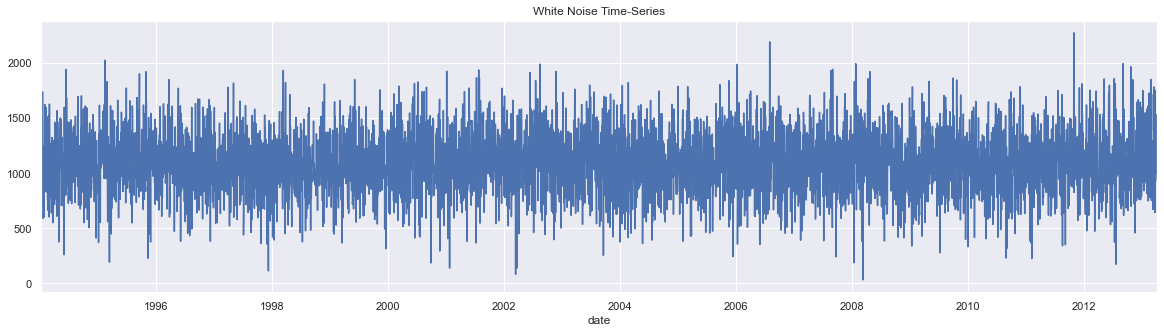

In [15]:
df.wn.plot(figsize = (20,5))
plt.title('White Noise Time-Series')
plt.show()

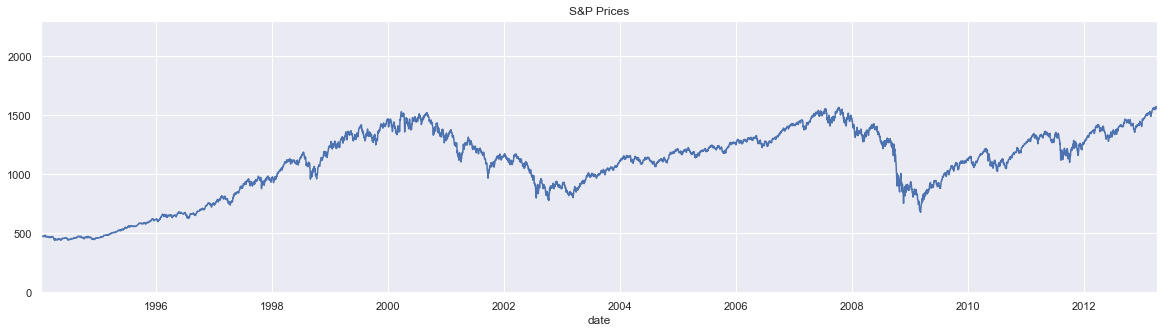

In [17]:
df.market_value.plot(figsize = (20,5))
plt.title('S&P Prices')
plt.ylim(0, 2300)
plt.show()

## Random Walk

In [18]:
rw = pd.read_csv('RandWalk.csv')

In [22]:
rw

,date,price
0,07/01/1994,1122.139662
1,08/01/1994,1135.238562
2,09/01/1994,1109.897831
3,10/01/1994,1080.347860
4,11/01/1994,1082.095245
...,...,...
7024,01/04/2013,2263.675474
7025,02/04/2013,2225.000870
7026,03/04/2013,2190.787688
7027,04/04/2013,2195.240033


## Стационарность

тест Dickey-Fuller (DF-test)

In [19]:
sts.adfuller(df.market_value)

(-1.736984745235241,
 0.4121645696770635,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

На всех уровнях значимости не можем подтвердить стационарность

In [20]:
sts.adfuller(wn)

(-71.41001720215914,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70715.96988404934)

In [23]:
sts.adfuller(rw.price)

(-1.5198946901184296,
 0.5236477720694194,
 0,
 7028,
 {'1%': -3.4312808039348894,
  '5%': -2.8619513408164483,
  '10%': -2.566988952715846},
 62547.63026051088)

## Сезонность

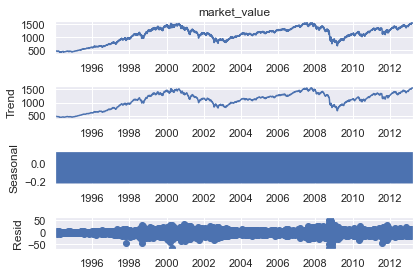

In [24]:
s_dec_additive = seasonal_decompose(df.market_value, model = 'additive')
s_dec_additive.plot()
plt.show()

s_dec_multi = seasonal_decompose(df.market_value, model = 'multiplicative')
s_dec_multi.plot()
plt.show()

## ACF функция авто-корелляции

Text(0.5, 1.0, 'ACF S&P')

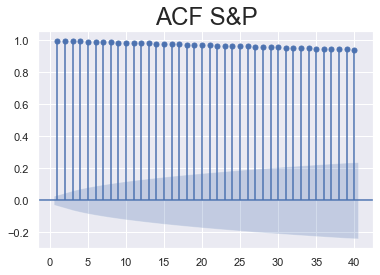

In [33]:
sgt.plot_acf(df.market_value,  lags = 40, zero = False)
plt.title('ACF S&P', size = 24)

Text(0.5, 1.0, 'ACF White Noise')

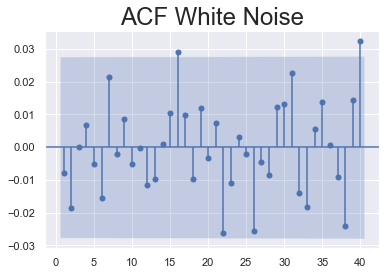

In [31]:
sgt.plot_acf(wn,  lags = 40, zero = False)
plt.title('ACF White Noise', size = 24)

Text(0.5, 1.0, 'ACF Random Walk')

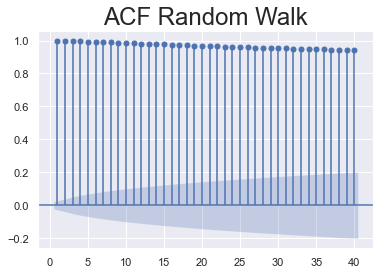

In [32]:
sgt.plot_acf(rw.price,  lags = 40, zero = False)
plt.title('ACF Random Walk', size = 24)

## PACF - Partial Auto Correlation Function

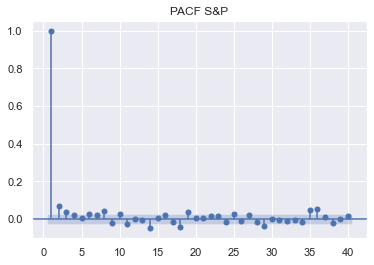

In [36]:
sgt.plot_pacf(df.market_value, lags = 40, zero = False, method= ('ols'))
plt.title('PACF S&P')
plt.show()

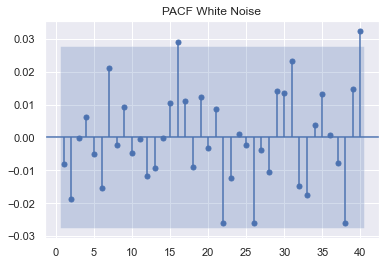

In [37]:
sgt.plot_pacf(wn, lags = 40, zero = False, method= ('ols'))
plt.title('PACF White Noise')
plt.show()

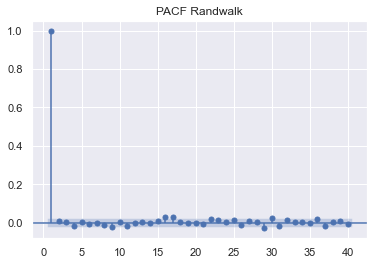

In [38]:
sgt.plot_pacf(rw.price, lags = 40, zero = False, method= ('ols'))
plt.title('PACF Randwalk')
plt.show()